In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd

# Importing the dataset.

In [242]:
import pandas as pd

def fill_missing_values(df):
    df_filled = df.copy()

    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                # Numeric column → fill with mean
                df_filled[col] = df[col].fillna(df[col].mean())
            else:
                # Categorical column → fill with mode
                df_filled[col] = df[col].fillna(df[col].mode()[0])
    
    return df_filled

In [269]:
mapping = {
    'Always': 2,
    'Most of the Time': 1,
    'Rarely': 0
}


df = pd.read_csv('Train_data.csv')
df['Y'] = df['Y'].map(mapping)
df

,Q5_1,Q6,Q7,Q8,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,...,Q64_1,Q64_2,Q64_3,Q64_4,Q66_1,Q66_2,Q66_3,Q68,Q69,Y
0,"On a scale of 1 to 10, how serious of a public...",How likely do you think it is that you could c...,How likely do you think it is that you may get...,How likely do you think it is that someone you...,Please read each statement and indicate how of...,Please read each statement and indicate how of...,Please read each statement and indicate how of...,Please read each statement and indicate how of...,Please read each statement and indicate how of...,Please read each statement and indicate how of...,...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,Please indicate the extent to which you agree ...,What is your age?,What is your gender?,NaN
1,7,1,1,1,2,2,4,4,4,4,...,5,5,5,5,7,7,7,19,2,1.0
2,8,2,2,1,1,2,4,3,2,1,...,7,7,7,7,7,7,7,18,1,2.0
3,9,1,2,1,3,3,4,2,5,5,...,5,5,7,7,7,7,7,20,2,2.0
4,6,2,3,1,2,2,2,2,3,3,...,7,7,7,7,7,7,7,19,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7,4,4,3,4,2,4,2,2,4,...,5,5,5,5,5,5,5,20,1,2.0
173,6,1,2,1,1,2,3,3,3,2,...,4,4,7,7,7,7,7,19,1,2.0
174,6,3,3,2,4,4,4,4,3,4,...,7,7,5,7,5,5,5,19,1,1.0
175,5,1,1,1,2,2,3,2,2,2,...,2,2,2,7,6,6,6,19,2,1.0


In [270]:
df = df.iloc[1:].reset_index(drop=True)
X = df.drop(['Y'], axis=1)
y = df[['Y']].astype(int)


In [271]:
X = fill_missing_values(X)


In [272]:
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)



In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Primary Analysis

In [258]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import warnings
from sklearn.svm import SVC

import random
import numpy as np
import pandas as pd
import warnings

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

# Custom accuracy: 1 - (sum of absolute errors / total)
def custom_accuracy(y_true, y_pred):
    error = np.sum(np.abs(y_pred - y_true))
    return 1 - error / len(y_true)


def evaluate_models_on_preprocessed_data(data_list, dataset_names, cv_folds=10, seed=42):
    # Set global random seeds
    random.seed(seed)
    np.random.seed(seed)

    models = {
        'LogisticRegression': LogisticRegression(max_iter=200, solver='lbfgs', random_state=seed),
        'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=15, 
                                                max_leaf_nodes=50, random_state=seed),
        'SVC': SVC(kernel='linear', C=1.0, max_iter=300, random_state=seed),
        'DecisionTree': DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, 
                                               min_samples_split=10, random_state=seed),
        'LDA': LinearDiscriminantAnalysis(solver='svd') ,
        'KNN': KNeighborsClassifier(n_neighbors=3)
    }

    scoring = {
        'custom_accuracy': make_scorer(custom_accuracy),
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted', zero_division=0),
        'f1': make_scorer(f1_score, average='weighted', zero_division=0)
    }
    results = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        for (X, y), name in zip(data_list, dataset_names):
            if hasattr(X, 'toarray'):
                X = X.toarray()
            print('-' * 5)
            for model_name, model in models.items():
                print('*' * 10)
                cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
                cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

                computational_cost = cv_results['fit_time'].mean() + cv_results['score_time'].mean()

                results.append({
                    'Dataset': name,
                    'Model': model_name,
                    'Accuracy': cv_results['test_accuracy'].mean(),
                    'Precision': cv_results['test_precision'].mean(),
                    'Recall': cv_results['test_recall'].mean(),
                    'F1-Score': cv_results['test_f1'].mean(),
                    'ComputationalCost': computational_cost
                })

    return pd.DataFrame(results)


In [259]:
# Example:
# Suppose you have:
data_list = [(X,y)]
dataset_names = ['Iris']
results_df = evaluate_models_on_preprocessed_data(data_list, dataset_names)

# Show results
print(results_df)

-----
**********
**********
**********
**********
**********
**********
  Dataset               Model  Accuracy  Precision    Recall  F1-Score  \
0    Iris  LogisticRegression  0.557843   0.569837  0.557843  0.553093   
1    Iris        RandomForest  0.673203   0.683732  0.673203  0.661215   
2    Iris                 SVC  0.535294   0.548052  0.535294  0.527489   
3    Iris        DecisionTree  0.580719   0.588726  0.580719  0.572713   
4    Iris                 LDA  0.279412   0.301597  0.279412  0.270816   
5    Iris                 KNN  0.582026   0.567471  0.582026  0.553931   

   ComputationalCost  
0           0.061819  
1           0.209144  
2           0.044753  
3           0.051129  
4           0.109290  
5           0.052366  


In primary analysis we considered several performance metrics and computational cost, if the decision maker is interrested in it. Since our primary intenrion is accuracy we choose Random Forest and SVC. But we don't stop here. We will try to optimize their parameters. 

# Random Forest

In [282]:
if hasattr(X, 'toarray'):
    X = X.toarray()
if hasattr(X_train, 'toarray'):
    X_train = X_train.toarray()    
if hasattr(y, 'toarray'):
    y_train = y_train.toarray()    
if hasattr(y, 'toarray'):
    y_test = y_test.toarray()  
if hasattr(y, 'toarray'):
    X_test = X_test.toarray() 
if hasattr(y, 'toarray'):
    y = y.toarray()    

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomForestRegressor
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold CV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best model and its hyperparameters
best_rf = grid_search.best_estimator_
print("Best parameters from CV:", grid_search.best_params_)

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Test MSE (random forest): {mse_rf:.4f}")


Best parameters from CV: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Test MSE (random forest): 0.1944


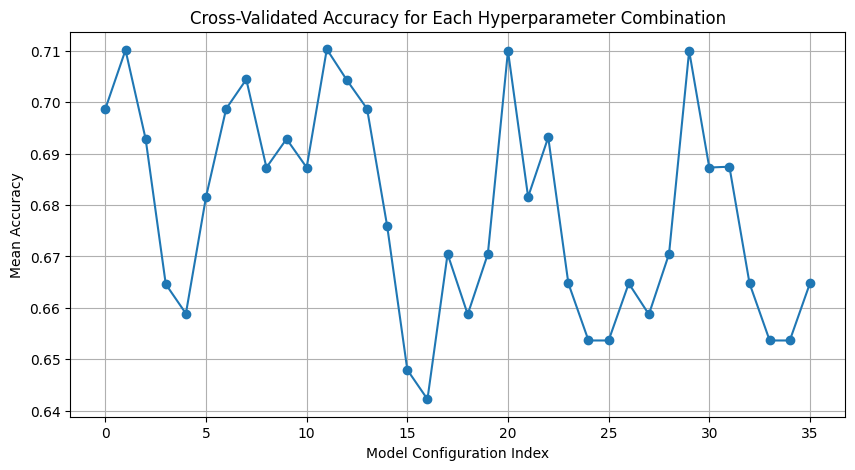

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot mean accuracy for each configuration
plt.figure(figsize=(10, 5))
plt.plot(results_df['mean_test_score'], marker='o')
plt.title('Cross-Validated Accuracy for Each Hyperparameter Combination')
plt.xlabel('Model Configuration Index')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()


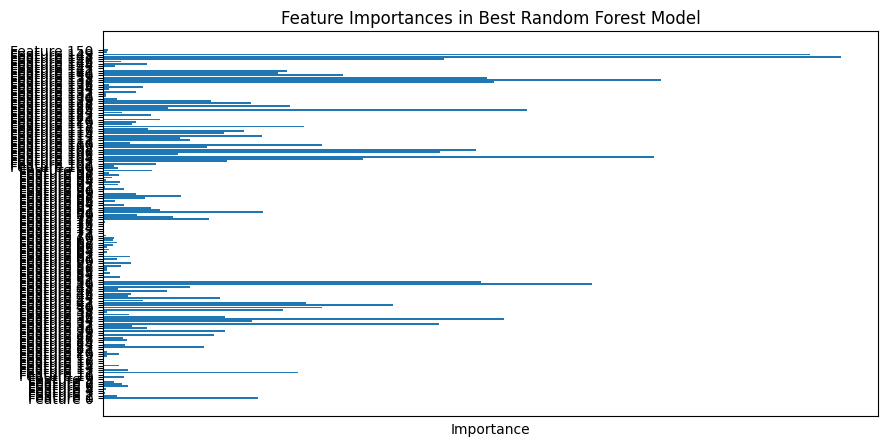

In [307]:
# Plot feature importances
importances = best_rf.feature_importances_
feature_names = [f'Feature {i}' for i in range(len(importances))]

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances in Best Random Forest Model')
# plt.grid(True)
plt.xticks([]) 
plt.show()


# SVC

In [314]:
y_train = np.array(y_train['Y'])
y_test = np.array(y_test['Y'])

In [328]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Set random seed
seed = 42



# Step 1: Initial SVC model
initial_svc = SVC(kernel='poly', C=1.0, max_iter=300, random_state=seed)

# Step 2: Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'max_iter': [50, 100, 300, 1000, 5000]
}

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=seed),
                           param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Step 3: Best model and evaluation
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters:", grid_search.best_params_)
print("Test accuracy with optimized SVC:", accuracy)


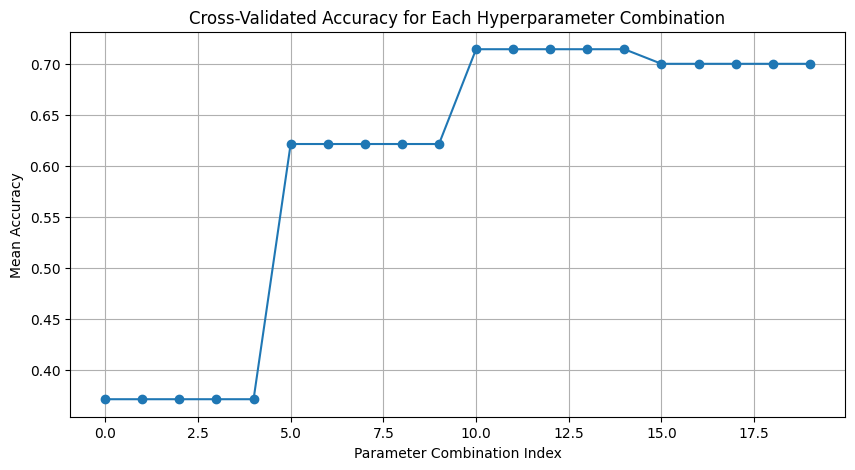

In [322]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert GridSearchCV results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot mean cross-validated accuracy for each parameter set
plt.figure(figsize=(10, 5))
plt.plot(results_df['mean_test_score'], marker='o')
plt.title('Cross-Validated Accuracy for Each Hyperparameter Combination')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()


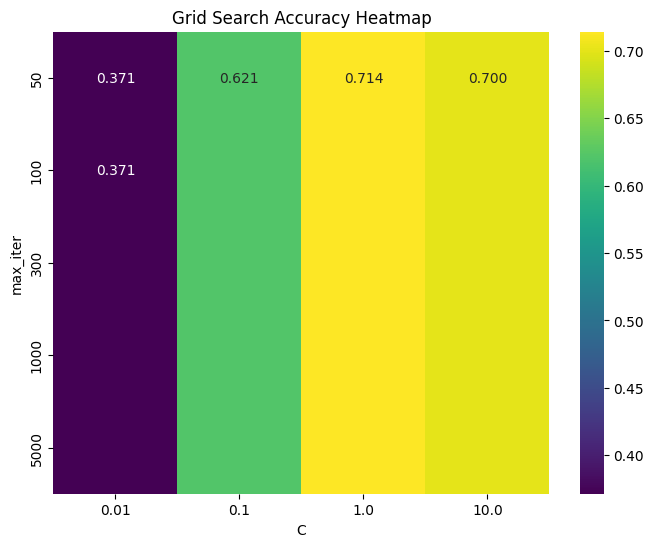

In [324]:
import seaborn as sns

# Pivot table for heatmap
heatmap_data = results_df.pivot(index='param_max_iter', columns='param_C', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title("Grid Search Accuracy Heatmap")
plt.xlabel("C")
plt.ylabel("max_iter")
plt.show()
